In [1]:
import sys
sys.path.insert(1,"../src")
import tensorflow as tf
import keras as tfk
tfkl = tf.keras.layers
import gardn_util
import GA_util
import util
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from tfa_spectral import SpectralNormalization as SN
from attention_util import SelfAttnModel
import matplotlib.pyplot as plt
import numpy as np

In [2]:


today = '2024-02-08'


init = True
track_agreement=False
EPOCHS =20
LATENT_DIM = 64


if init == True:
    g_loss_save = []
    d_loss_save = []
    gp_loss_save = []
    generator  = gardn_util.create_GARDN_toehold_generator(latent_dim=LATENT_DIM,filters=128)
    discriminator = gardn_util.create_GARDN_toehold_discriminator(latent_dim=128)
    print(discriminator.summary())

Metal device set to: Apple M1 Ultra


2025-03-18 18:19:15.542901: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-03-18 18:19:15.542929: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "discriminator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 4, 60, 1)]        0         
                                                                 
 spectral_normalization_4 (S  (None, 1, 60, 64)        4736      
 pectralNormalization)                                           
                                                                 
 layer_normalization (LayerN  (None, 1, 60, 64)        128       
 ormalization)                                                   
                                                                 
 spectral_normalization_5 (S  (None, 1, 60, 32)        18496     
 pectralNormalization)                                           
                                                                 
 layer_normalization_1 (Laye  (None, 1, 60, 32)        64        
 rNormalization)                                     

In [3]:

    
# generator = tfk.models.load_model('../models/toehold_generator_%s'%today)
# discriminator = tfk.models.load_model('../models/toehold_discriminator_%s'%today)
# g_loss_save = []
# d_loss_save = []
# gp_loss_save = []


seqs = np.load('../data/toehold_data/collins_encoded.npy').astype('float32')
idx = np.arange(0,seqs.shape[0])
np.random.shuffle(idx)

seqs = seqs[idx,:,:]
seqs = tf.expand_dims(seqs,axis=-1)
seq_inputs = tf.data.Dataset.from_tensor_slices(seqs) # convert one-hot arrays to tensor dataset




if track_agreement:
    ###Showing Structural Agreement Over Model Iterations
    g_loss_save,d_loss_save,gp_loss_save,agreement_save = gardn_util.track_agreement(generator,discriminator,seq_inputs,EPOCHS,3,64,g_loss_save=g_loss_save,d_loss_save=d_loss_save,gp_loss_save=gp_loss_save)
else:
    ###Or just regular training
    g_loss_save,d_loss_save,gp_loss_save = gardn_util.train(generator,discriminator,seq_inputs,EPOCHS,1,64,z_dim=LATENT_DIM,g_loss_save=g_loss_save,d_loss_save=d_loss_save,gp_loss_save=gp_loss_save)

epoch: 0


2025-03-18 18:19:18.484582: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2025-03-18 18:19:18.486957: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-03-18 18:19:20.779708: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Step 0
d_loss 233.0633, gp_loss 233.1051, g_loss -0.0272
TAAAAAAAAAAAAAATTTTAAATTTCCATCCAATTTTTTTTTGGATGGTTTTTTAAAATT



KeyboardInterrupt



(10000, 64)


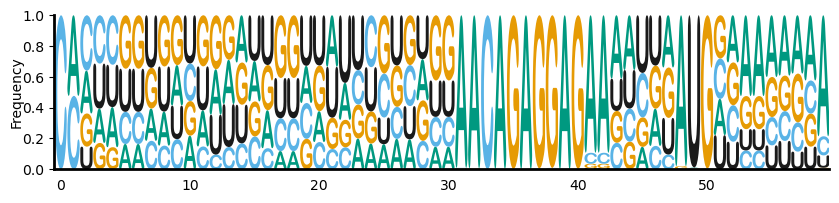

In [7]:
tmp = np.random.normal(size=(10000,LATENT_DIM))
print(tmp.shape)
fake_seqs = generator(tmp)

util.plot_logo(fake_seqs[:,:,:,0])
plt.savefig('../figures/attention_toehold.svg',transparent=True)

In [9]:
for i in range(3):
    print(GA_util.unencode(fake_seqs[i,:,:,0]))

CACTCTTCGACGATACAGGCGGCAGCAGACCAACAGAGGAGAAGTGTAATGGCAAAAAGA
CCAGGGGGATCATCCTCTTACAGCCTCATAAAACAGAGGAGAATAAGTATGAGTTGTGCA
CCTCGAATTCATGGCGTTTTCAGCGTAGTCCAACAGAGGAGAATACAGATGATGGAGCAA


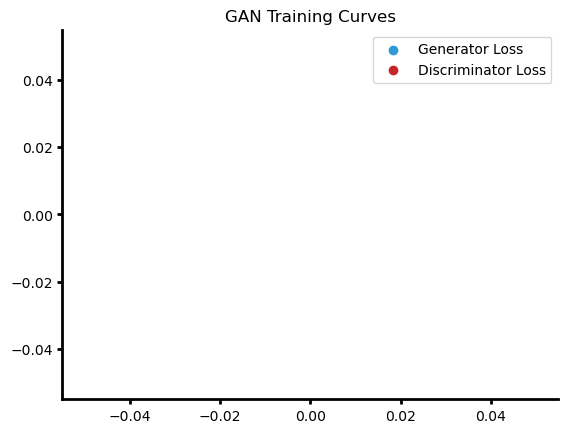

In [16]:
RED = '#C62626'
BLUE = '#2E9AD6'

plt.figure()
plt.title('GAN Training Curves')
plt.scatter(np.arange(0,len(g_loss_save)),g_loss_save,color=BLUE)
plt.scatter(np.arange(0,len(g_loss_save)),d_loss_save,color=RED)
plt.legend(['Generator Loss','Discriminator Loss'])
plt.subplot().spines['right'].set_visible(False)
plt.subplot().spines['top'].set_visible(False)
plt.subplot().spines['left'].set_linewidth(2)
plt.subplot().spines['bottom'].set_linewidth(2)
plt.gca().xaxis.set_tick_params(width=2)
plt.gca().yaxis.set_tick_params(width=2)

In [6]:
np.save('g_loss_5.npy',g_loss_save)
np.save('d_loss_5.npy',d_loss_save)
np.save('gp_loss_5.npy',gp_loss_save)

In [7]:
# g_loss_0
# d_loss_0
# gp_loss_0

In [15]:
import datetime

today ='2024-02-15'
print(today)
generator.save('../models/toehold_generator_%s'%today)
discriminator.save('../models/toehold_discriminator_%s'%today)

2024-02-15


INFO:tensorflow:Assets written to: ../models/toehold_generator_2024-02-15/assets


INFO:tensorflow:Assets written to: ../models/toehold_generator_2024-02-15/assets


INFO:tensorflow:Assets written to: ../models/toehold_discriminator_2024-02-15/assets


INFO:tensorflow:Assets written to: ../models/toehold_discriminator_2024-02-15/assets


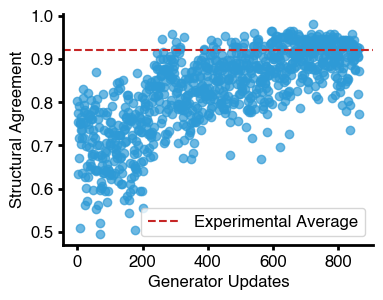

In [32]:
plt.figure(figsize=[4,3])
plt.rcParams.update({'font.size': 12,'font.family':'Helvetica'})
plt.scatter(np.arange(0,len(agreement_save)),agreement_save,marker='o',color= '#2E9AD6',alpha=0.7)
# plt.plot(agreement_save,linestyle='--',color='black')
plt.subplot().spines['right'].set_visible(False)
plt.subplot().spines['top'].set_visible(False)
plt.subplot().spines['left'].set_linewidth(2)
plt.subplot().spines['bottom'].set_linewidth(2)
plt.gca().xaxis.set_tick_params(width=2)
plt.gca().yaxis.set_tick_params(width=2)
# plt.title('Model Agreement vs. Adversarial Training Iterations')
plt.axhline(y=0.92,label='Experimental Average',linestyle='--',color='#C62626')
plt.legend()
plt.ylabel('Structural Agreement')
plt.xlabel('Generator Updates')
# plt.ylim([0,1])
plt.savefig('../figures/Agreement_increase.svg',dpi=500,transparent=True,pad_inches=1,bbox_inches='tight')

(10000, 64)


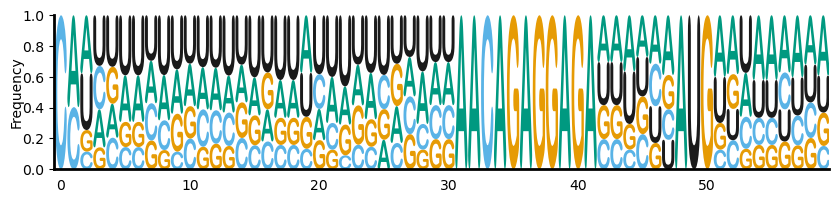

In [14]:
tmp = np.random.normal(size=(10000,LATENT_DIM))
print(tmp.shape)
fake_seqs = generator(tmp)

util.plot_logo(fake_seqs[:,:,:,0])

In [8]:
d = np.load('d_loss_5.npy')
g= np.load('g_loss_5.npy')
gp = np.load('gp_loss_5.npy')

d2 = np.load('d_loss_3.npy')
g2= np.load('g_loss_3.npy')
gp2 = np.load('gp_loss_3.npy')


d3 = np.load('d_loss_4.npy')
g3= np.load('g_loss_4.npy')
gp3 = np.load('gp_loss_4.npy')

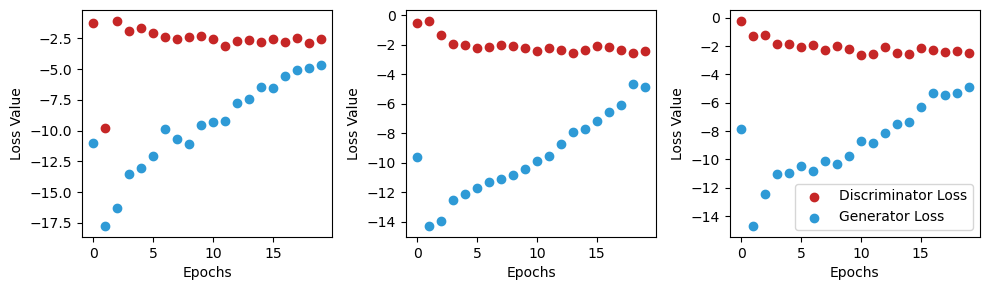

In [11]:
plt.figure(figsize=[10,3])
plt.subplot(1,3,1)
plt.scatter(np.arange(0,d.shape[0]),d,color=util.RED,label='Discriminator Loss')
plt.scatter(np.arange(0,g.shape[0]),g,color=util.BLUE,label='Generator Loss')
# plt.scatter(np.arange(0,gp.shape[0]),gp)
# plt.legend()
plt.ylabel('Loss Value')
plt.xlabel('Epochs')

plt.subplot(1,3,2)
plt.scatter(np.arange(0,d2.shape[0]),d2,color=util.RED,label='Discriminator Loss')
plt.scatter(np.arange(0,g2.shape[0]),g2,color=util.BLUE,label='Generator Loss')
# plt.scatter(np.arange(0,gp.shape[0]),gp)
# plt.legend()
plt.ylabel('Loss Value')
plt.xlabel('Epochs')

plt.subplot(1,3,3)
plt.scatter(np.arange(0,d3.shape[0]),d3,color=util.RED,label='Discriminator Loss')
plt.scatter(np.arange(0,g3.shape[0]),g3,color=util.BLUE,label='Generator Loss')
# plt.scatter(np.arange(0,gp.shape[0]),gp)
plt.legend()
plt.ylabel('Loss Value')
plt.xlabel('Epochs')

plt.tight_layout()
# plt.suptitle('Representative GAN Training Curves')
plt.savefig('../figures/GAN_curves.svg',transparent=True)
